# Prueba de Concepto: Análisis de la Guerra de Irak en 2003
Autor: Diego Sánchez Escribano

Fecha: 15 de julio de 2025

## 1. Objetivo
Para esta prueba de concepto se utilizará la guerra de Irak, iniciada en 2003. Se establece como "tiempo cero" (t-0) la fecha del 20 de marzo de 2003. Este día marca un punto de inflexión fáctico con el inicio de la campaña de bombardeos liderada por Estados Unidos sobre Bagdad. El período de análisis para la recolección de datos comprenderá los 24 meses inmediatamente anteriores a esta fecha: del 20 de marzo de 2001 al 19 de marzo de 2003.

## 2. Configuración y adquisición de datos
Los datos para la PoC se obtuvieron de Yahoo Finance. Se toman datos de los siguientes indicadores entre el 20 de marzo de 2003 y el 19 de marzo de 2003, momento en el que se inició la guerra de Irak:

- Petróleo o Crudo WTI
- S&P 500
- VIX
- Gold
- Lockheed Martin (LMT): El mayor contratista de defensa del mundo.
- Northrop Grumman (NOC): Gigante en aeroespacial y defensa.
- General Dynamics (GD): Fabricante de tanques, submarinos y sistemas de armas
- DAX

Una vez recopilados todos los datos, se combinan en un solo DataFrame para su análisis.

In [2]:
import pandas as pd
import yfinance as yf

# --- 1. Definición de Parámetros ---

START_DATE = "2001-03-20"
END_DATE = "2003-03-19"  


# Creamos un diccionario con todos los tickers que queremos de Yahoo Finance
TICKERS = {
    "crude": "CL=F",
    "SP500": "^GSPC",
    "vix": "^VIX",
    "dax": "^GDAXI",
    "gold": "GC=F",
    "lockheed": "LMT",
    "northrop": "NOC",
    "gen_dynamics": "GD"
}

# --- 2. Descarga de Datos desde yfinance ---

# Usamos un diccionario para almacenar todos los dataframes descargados
dataframes = {}

for name, ticker in TICKERS.items():
    print(f"Descargando datos para {name} ({ticker})...")
    df = yf.download(ticker, start=START_DATE, end=END_DATE)
    if not df.empty:
        dataframes[name] = df
        print(f"✅ Datos para {name} descargados. {len(df)} filas.")
    else:
        print(f"⚠️ No se encontraron datos para {name} ({ticker}).")

# Acceso a un dataframe (ejemplo: Rublo)
print("\n--- Inspección Rápida de un DataFrame Descargado (Crudo) ---")
if 'crude' in dataframes:
    crude_df = dataframes['crude']
    print(crude_df.head())
    date_close = crude_df[["Close"]]
    print(date_close.head())

/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_6099/3803746495.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_6099/3803746495.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_6099/3803746495.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_6099/3803746495.py:29: FutureWarning: YF.download() has changed argument auto

Descargando datos para crude (CL=F)...
✅ Datos para crude descargados. 496 filas.
Descargando datos para SP500 (^GSPC)...
✅ Datos para SP500 descargados. 499 filas.
Descargando datos para vix (^VIX)...
✅ Datos para vix descargados. 499 filas.
Descargando datos para dax (^GDAXI)...
✅ Datos para dax descargados. 505 filas.
Descargando datos para gold (GC=F)...
✅ Datos para gold descargados. 496 filas.
Descargando datos para lockheed (LMT)...
✅ Datos para lockheed descargados. 499 filas.
Descargando datos para northrop (NOC)...
✅ Datos para northrop descargados. 499 filas.
Descargando datos para gen_dynamics (GD)...
✅ Datos para gen_dynamics descargados. 499 filas.

--- Inspección Rápida de un DataFrame Descargado (Crudo) ---
Price           Close       High        Low       Open  Volume
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F
Date                                                          
2001-03-20  25.900000  26.490000  25.700001  26.250000  100723
2001-03-21  26.

## 3. Limpieza y unificación de los datos
Antes de ser analizados se procede a limpiar los datos obtenidos. Dado que las fechas de apertura y cierre de los mercados no siempre coindice, hay un desfase entre las fechas de los datos descargados.

In [3]:
from pandas import DataFrame

print("Iniciando Limpieza y Unificación de Datos...")

# --- 1. Definición de Nombres de Columna ---
# Creamos un diccionario para mapear nuestros nombres cortos a los nombres finales
COLUMN_NAMES = {
    "crude": "crude",
    "SP500": "SP500",
    "vix": "vix",
    "dax": "DAX",
    "gold": "gold",
    "lockheed": "LMT",
    "northrop": "NOC",
    "gen_dynamics": "GD"
}

# --- 2. Preparar la lista para guardar los DataFrames limpios ---
cleaned_dfs = []

# --- 3. Limpiar todos los DataFrames de yfinance en un bucle ---
for name, df in dataframes.items():
    df.index = pd.to_datetime(df.index)
    final_col_name = COLUMN_NAMES[name] 
    close_values = df['Close'].values
    cleaned_df = pd.DataFrame(data=close_values, index=df.index, columns=[final_col_name])
    cleaned_dfs.append(cleaned_df)
    print(f"✅ DataFrame de '{final_col_name}' limpiado y estandarizado.")

# --- 4. Unir todos los DataFrames limpios en una única tabla maestra ---
master_df = pd.concat(cleaned_dfs, axis=1)

# --- 5. Manejar los valores nulos (NaN) ---
master_df = master_df.fillna(method='ffill')
master_df = master_df.fillna(method='bfill')

# --- 6. Inspección Final ---
print("\n--- Proceso de Unificación Completado ---")
print("Dimensiones de la tabla maestra:", master_df.shape)
print("\nPrimeras 5 filas de la tabla maestra con nombres finales:")
print(master_df.head())

Iniciando Limpieza y Unificación de Datos...
✅ DataFrame de 'crude' limpiado y estandarizado.
✅ DataFrame de 'SP500' limpiado y estandarizado.
✅ DataFrame de 'vix' limpiado y estandarizado.
✅ DataFrame de 'DAX' limpiado y estandarizado.
✅ DataFrame de 'gold' limpiado y estandarizado.
✅ DataFrame de 'LMT' limpiado y estandarizado.
✅ DataFrame de 'NOC' limpiado y estandarizado.
✅ DataFrame de 'GD' limpiado y estandarizado.

--- Proceso de Unificación Completado ---
Dimensiones de la tabla maestra: (515, 8)

Primeras 5 filas de la tabla maestra con nombres finales:
                crude        SP500        vix          DAX        gold  \
Date                                                                     
2001-03-20  25.900000  1142.619995  30.959999  5782.160156  260.500000   
2001-03-21  26.799999  1122.140015  31.930000  5622.089844  261.899994   
2001-03-22  26.520000  1117.579956  32.840000  5388.020020  261.100006   
2001-03-23  27.299999  1139.829956  30.450001  5544.669922  2

/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_6099/3833805670.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df = master_df.fillna(method='ffill')
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_6099/3833805670.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df = master_df.fillna(method='bfill')


## 4. Gráficos de los índices normalizados
Para poder analizar los datos visualmente, se crea un gráfico con la evolución de los precios de los mercados, normalizados en Base 100 para poder compararlos correctamente y sacar conclusiones.

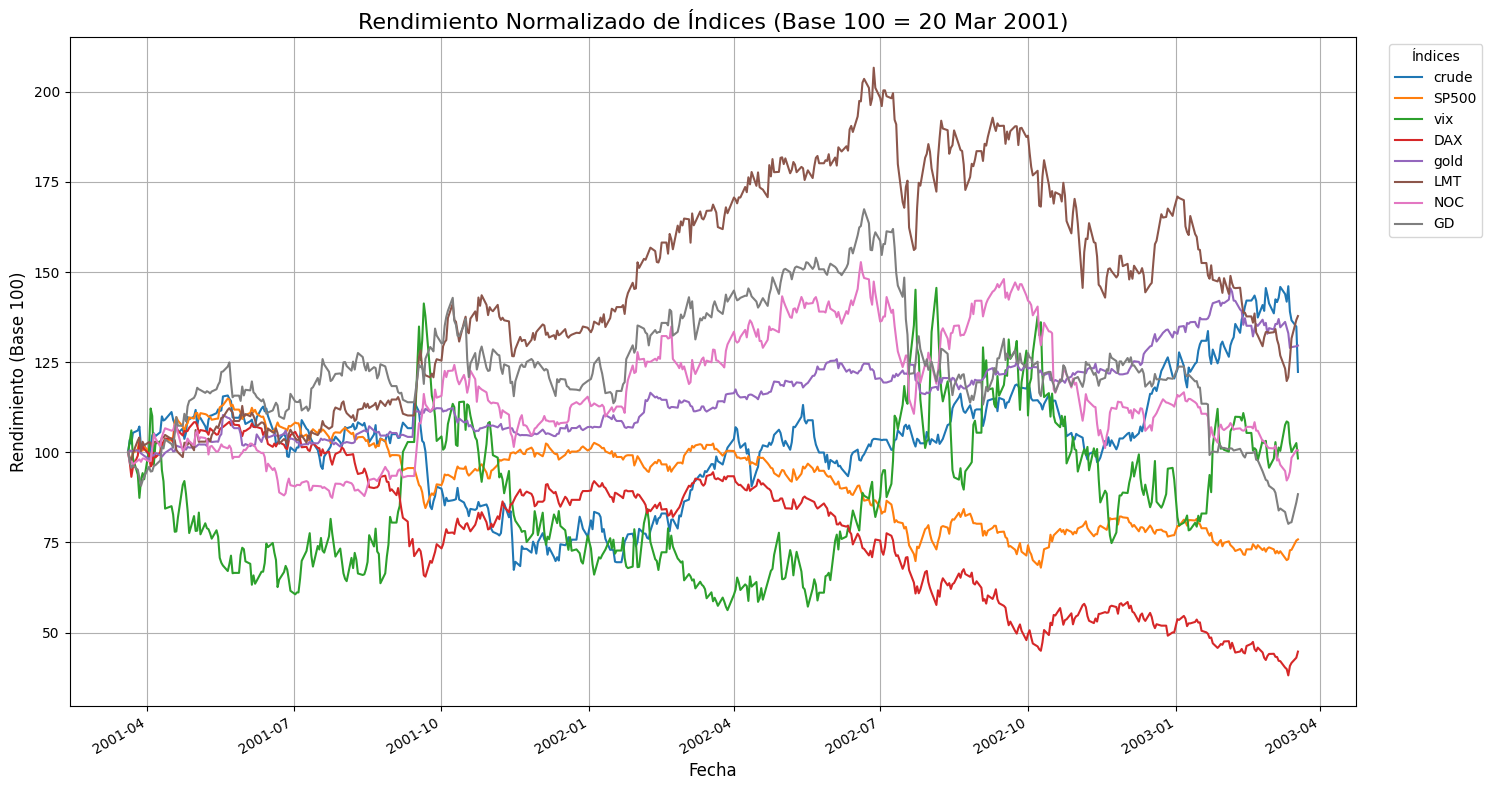

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Crear el DataFrame Normalizado ---

# Tomamos la primera fila de nuestra tabla como el punto de partida (base 100)
# .iloc[0] selecciona la primera fila por su posición
base_values = master_df.iloc[0]

# Dividimos cada valor en la tabla por su valor base y multiplicamos por 100
normalized_df = (master_df / base_values) * 100

# --- Paso 2: Graficar TODOS los índices juntos ---

# Creamos la figura y los ejes para tener más control
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos el DataFrame normalizado completo. Pandas se encarga de pintar una línea por cada columna.
normalized_df.plot(ax=ax, linewidth=1.5)

# --- Paso 3: Añadir los títulos ---

ax.set_title('Rendimiento Normalizado de Índices (Base 100 = 20 Mar 2001)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
# Movemos la leyenda fuera del área del gráfico para que no tape las líneas
ax.legend(title='Índices', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajusta el layout para que la leyenda no se corte
plt.tight_layout()
plt.show()

### 4.1 Gráfico con los índices predictores del evento
A continuación, se aislan sucesivamente distintos índices para eliminar ruido y poder ver con mayor claridad movimientos significativos de algunos índices.

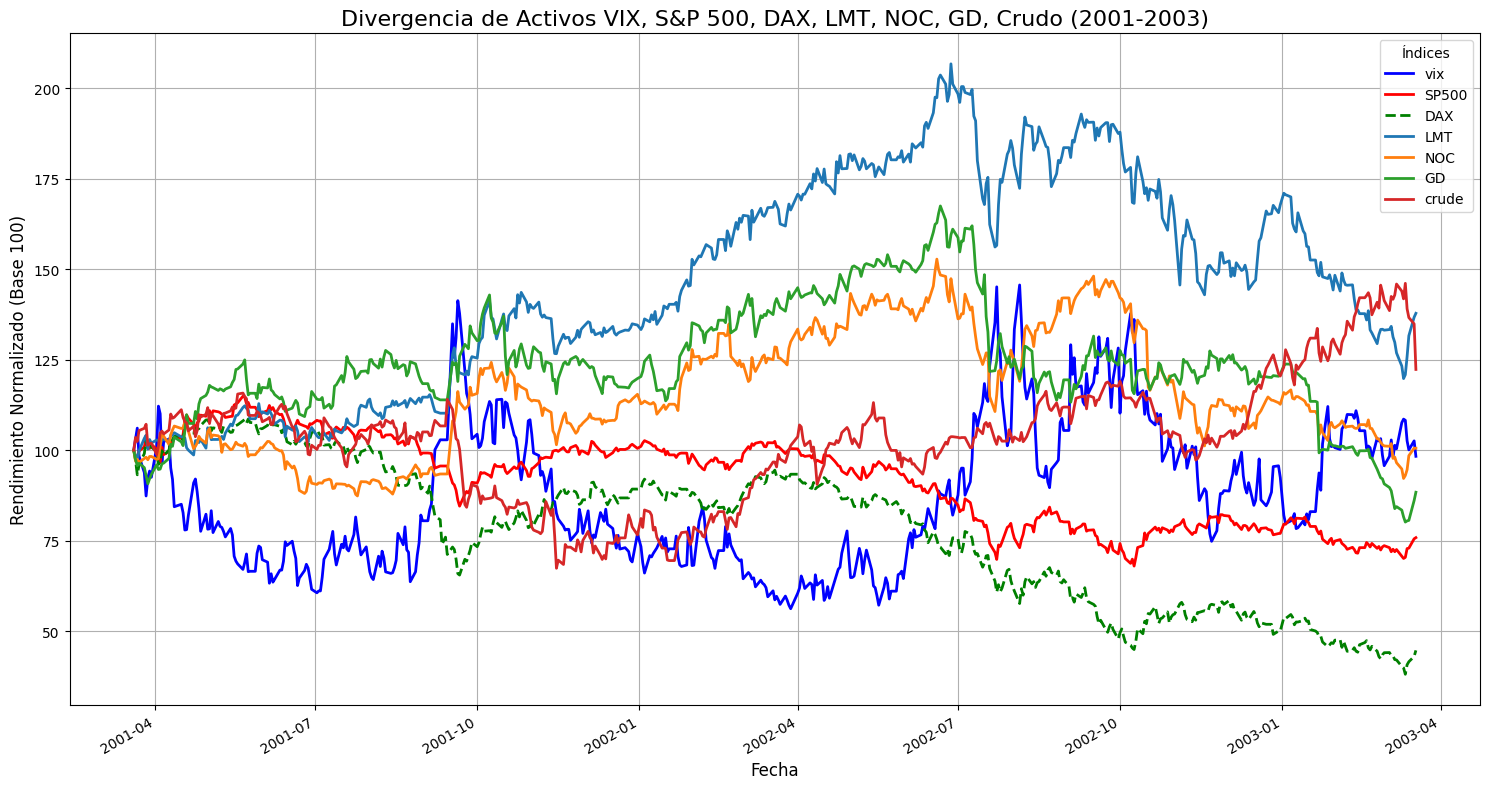

In [13]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['vix', 'SP500', 'DAX', 'LMT', 'NOC', 'GD', 'crude' ]

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos VIX, S&P 500, DAX, LMT, NOC, GD, Crudo (2001-2003)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

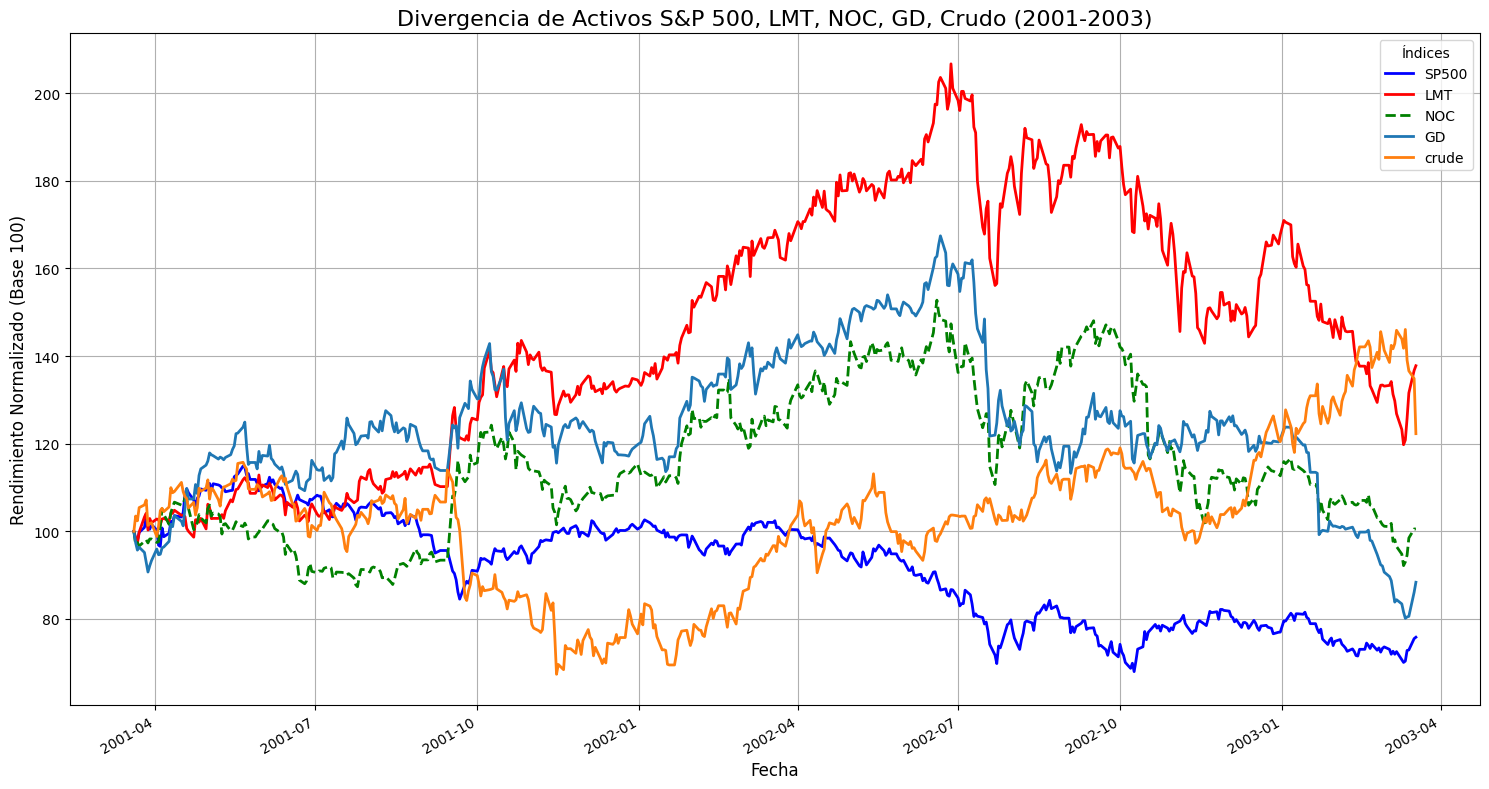

In [14]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['SP500','LMT', 'NOC', 'GD', 'crude' ]

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos S&P 500, LMT, NOC, GD, Crudo (2001-2003)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

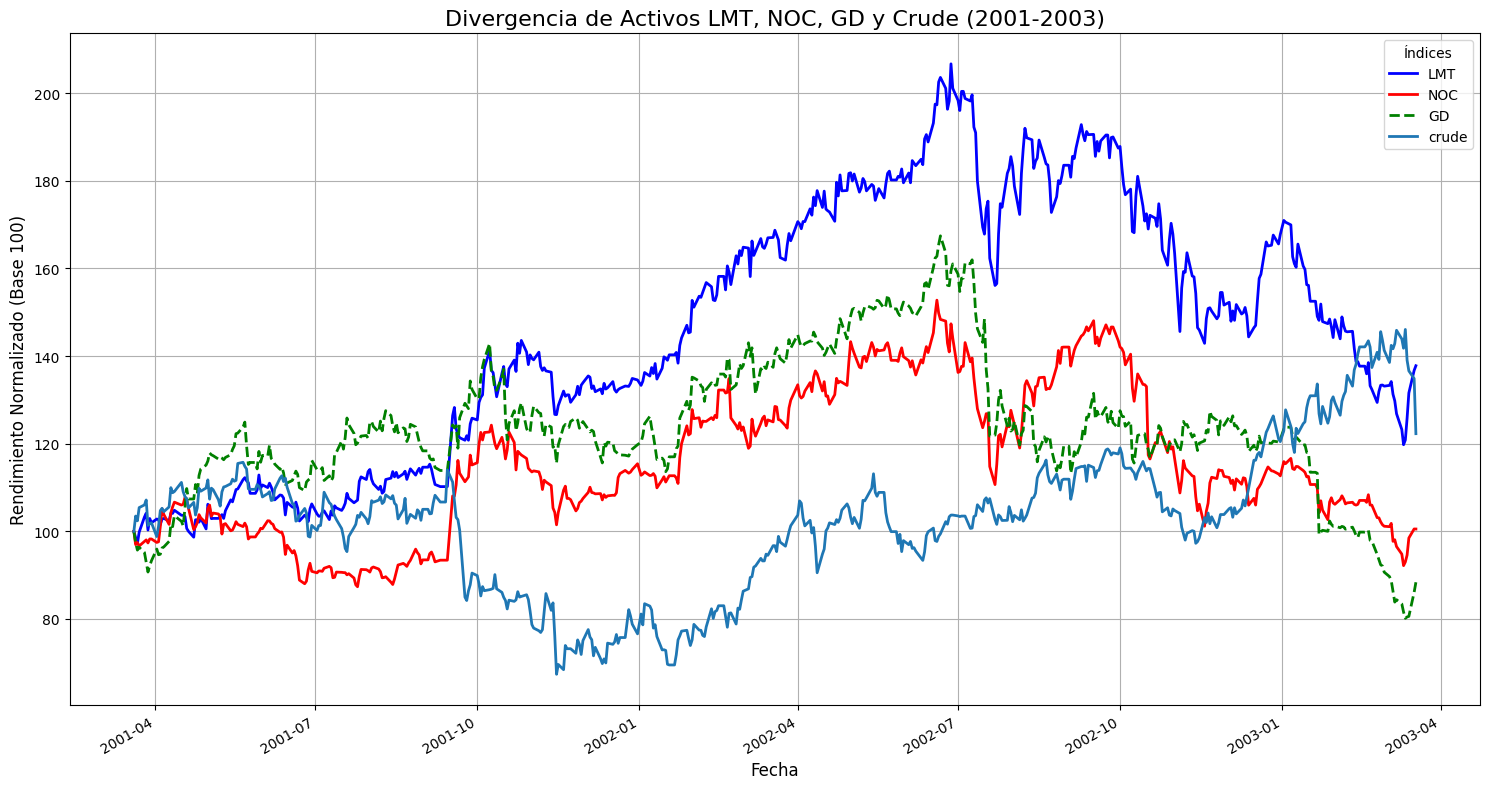

In [15]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['LMT', 'NOC', 'GD', 'crude' ]

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos LMT, NOC, GD y Crude (2001-2003)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

## 6. Conclusiones
El análisis de este caso de estudio valida la hipótesis del proyecto en un contexto de mercado muy diferente y complejo, demostrando que, incluso en un entorno "ruidoso" (post-crisis .com y post-11S), los mercados emitieron señales predictivas claras, aunque de una naturaleza distinta a los casos de Rusia.

Las principales observaciones son las siguientes:

1. Señal de la Industria Bélica: La evidencia más contundente es la divergencia inequívoca entre el sector de defensa y el mercado general. A lo largo de 2002, mientras el S&P 500 sufría, nuestro índice sintético de defensa (compuesto por LMT, NOC y GD) mostró un rendimiento muy superior. Esto indica una anticipación activa por parte de los inversores, que estaban rotando su capital hacia las empresas que se beneficiarían directamente de un conflicto militar a gran escala.

2. Señal de Impacto Estratégico (Energía): El precio del petróleo WTI actuó como un claro barómetro del riesgo. Su pronunciada subida en los meses previos a la invasión no se correspondía con la debilidad del mercado bursátil, lo que sugiere que el precio no subía por una fuerte demanda económica, sino por una creciente "prima de riesgo geopolítico" ante la alta probabilidad de una guerra en una región clave para la producción mundial de crudo.

3. Comportamiento del Mercado General: A diferencia de los casos anteriores, el mercado estadounidense (S&P 500) no mostró una caída aislada, sino que siguió su tendencia bajista general. Curiosamente, tocó fondo justo en el momento de la invasión y comenzó a recuperarse. Esto es un clásico ejemplo de "vender con el rumor, comprar con la noticia", donde la incertidumbre previa a la guerra castigó más a los mercados que el conflicto en sí.

En resumen, este caso demuestra que el tipo de señal predictiva depende de la naturaleza del conflicto. Si en los casos de Rusia la señal fue el debilitamiento del país agresor, aquí fue el fortalecimiento de la industria de la guerra y la valorización del activo estratégico en disputa (el petróleo). Esto añade una nueva dimensión y una robustez considerable a las conclusiones generales de la Prueba de Concepto.